# EXAMEN 3er PARCIAL 
### DAVID SANTANDER 
* https://github.com/DavidSantander0/machinelearnig-1.git *

In [7]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
#Importa la biblioteca seaborn, que se utiliza para realizar visualizaciones estadísticas 
#avanzadas. Seaborn está construido sobre matplotlib, y proporciona una interfaz más 
#amigable y con mayor capacidad para crear gráficos informativos. Se le asigna el alias sb.

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


In [ ]:

# 1. Cargar el dataset
# df = pd.read_csv("res/movie_genre_classification_final.csv")
#print(df.info())      # Info de columnas y tipos de datos
# print(df.isnull().sum()) #Cuantos nulos

# # 2. Eliminar columnas no numéricas
# df = df.drop(['Title','Director','Genre','Production_Company','Description',
#               'Lead_Actor','Country','Language','Content_Rating'], axis=1)

# # 3. Eliminar nulos
# # df = df.dropna() #aunque arriba confirme que no habia datos nulos...

# # 4. Seleccionar variables
# X_simple = df[['Budget_USD']] # Variable independiente
# y = df['BoxOffice_USD']  # VARIABLE OBJETIVO(dependiente)- este es el dato que voy a estimar.

# #hago la division de varibles con el train_test_split, pongo el size 0,2 para que sea 20% TEST y 80% TRAIN.
# #ademas pongo el random_state, para poder tener la misma division de datos entre train y test
# #sin el random cada ves que corro el script haria una division diferente del 80-20 y me podria dar una prediccion diferente.
# X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42) 

# # 5. Entrenar el modelo
# modelo_simple = LinearRegression() #aqui creo la regresion lineal, gracias a sklearn en este caso.
# modelo_simple.fit(X_train, y_train) #aqui ya se entrena el modelo, con X_train,Y_train que son las variables de entrenamiento

# # # 6. Evaluar el modelo
# y_pred = modelo_simple.predict(X_test)
# print("(MSE):", mean_squared_error(y_test, y_pred)) #aqui veo el error, o que tan lejos estan las predicciones de lo real. 
# print("R²", r2_score(y_test, y_pred)) #con el r2 sabemos que tan bien logra explicar o que eficiencia tiene el modelo
#EN ESTE CASO DE LA REGRESION LINEAL SIMPLE, EL MODELO NO LOGRA CAPTURAR NINGUNA RELACION SIGNIFICATIVA O IMPORTANTE
#ENTRE EL PRESUPUESTO Y LA RECAUDACION. YA QUE TENEMOS un MSE alto que quiere decir que se equivoca demasiado
# y un r2 negativo, que significa que no logra explicar, o que falta una relacion entre presupuesto y taquilla. 

# #MULTIPLE!!
# # Variables independientes múltiples
# X_multi = df[['Budget_USD', 'Duration', 'Rating', 'Votes', 'Num_Awards', 'Critic_Reviews']]  # MATRIZ DE ENTRADA

# # Variable objetivo
# y = df['BoxOffice_USD']

# # División 80/20 con random_state para reproducibilidad
# X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)

# # Entrenar el modelo
# modelo_multi = LinearRegression()
# modelo_multi.fit(X_train, y_train)

# # Evaluar el modelo
# y_pred_multi = modelo_multi.predict(X_test)
# print("MULTIPLE")
# print("MSE:", mean_squared_error(y_test, y_pred_multi))  # Error cuadrático medio
# print("R²:", r2_score(y_test, y_pred_multi))             # Poder explicativo del modelo

# # Variables predictoras y objetivo
# X_multi = df[['Budget_USD', 'Duration', 'Rating', 'Votes', 'Num_Awards', 'Critic_Reviews']]
# y = df['BoxOffice_USD']

# # Filtrar películas con recaudaciones extremas (top 5%)
# q95 = y.quantile(0.95)
# X_multi = X_multi[y < q95]
# y = y[y < q95]

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_multi)

# # División
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# # Entrenamiento
# modelo_escalado = LinearRegression()
# modelo_escalado.fit(X_train, y_train)

# # Evaluación
# y_pred = modelo_escalado.predict(X_test)
# print("Modelo con filtrado de outliers y escalado")
# print("MSE:", mean_squared_error(y_test, y_pred))
# print("R²:", r2_score(y_test, y_pred))
# print("Coeficientes:", modelo_escalado.coef_)








Coeficientes: [0.03328473]
Intercepción: 40806286.76476303
MSE: 479528138764813.94
R²: 0.00021634042003415566


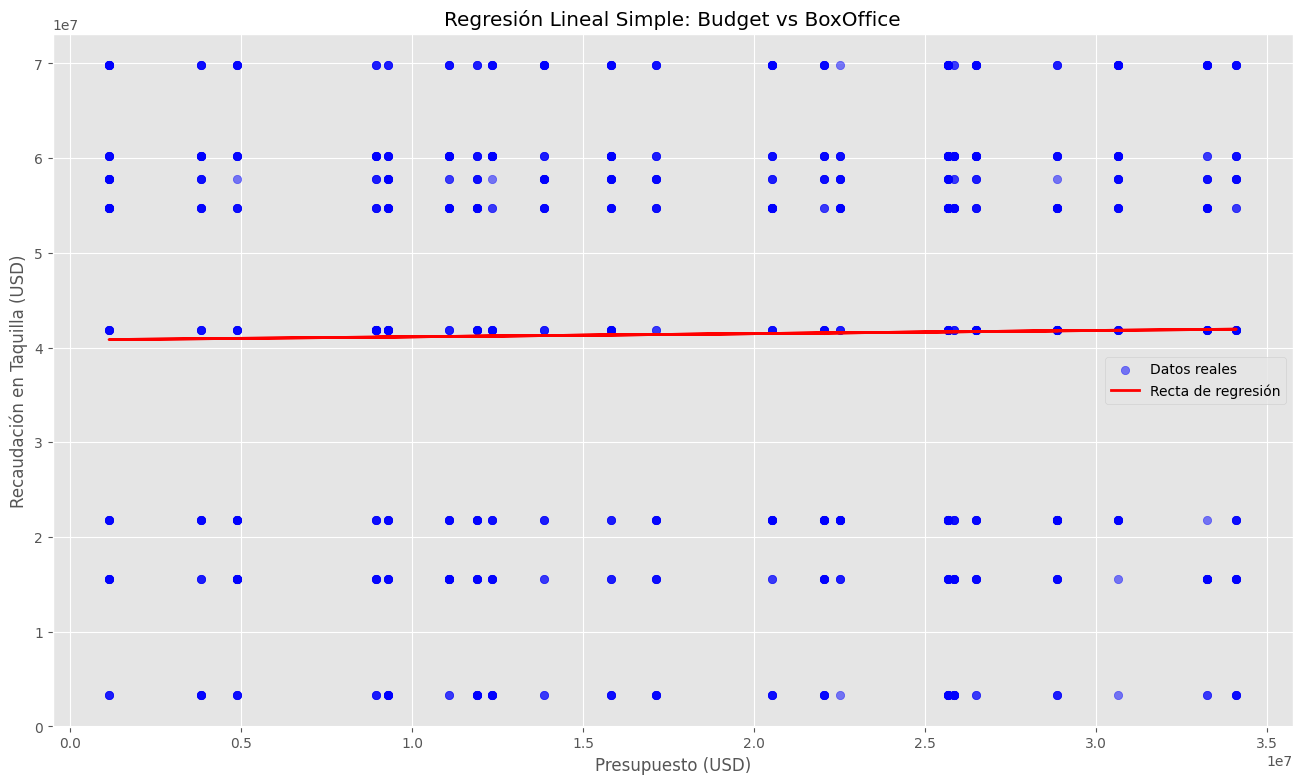

Predicción para película con $20,000,000: $41471981 de taquilla


C:\Users\David\AppData\Local\Temp\ipykernel_25844\4062431087.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Predicción para película con ${presupuesto_nuevo:,}: ${int(pred_nueva)} de taquilla")


In [17]:

# Cargar el dataset
df = pd.read_csv("res/movie_genre_classification_final.csv")

# Crear variable compuesta "impacto"
# Similar a la suma de "links + comentarios + imágenes" del PDF, acá combino rating crítico + votos del público
df['impacto'] = df['Rating'] * df['Critic_Reviews'] + df['Votes']

# Filtrar valores extremos para evitar que distorsionen la regresión
# Como hice en el ejercicio de artículos, elimino películas con presupuesto > 35 millones o taquilla > 80 millones
df_filtrado = df[(df['Budget_USD'] <= 3.5e7) & (df['BoxOffice_USD'] <= 8e7)]

# Seleccionar variables para regresión lineal simple
# Acá uso solo el presupuesto (X) como predictor, y la recaudación (y) como variable objetivo
X_train = np.array(df_filtrado[['Budget_USD']])
y_train = df_filtrado['BoxOffice_USD'].values

# Entrenar el modelo
# Creo el objeto de regresión lineal y lo entreno con los datos filtrados
modelo_simple = LinearRegression()
modelo_simple.fit(X_train, y_train)

# Realizar predicciones
# El modelo genera predicciones que luego voy a graficar
y_pred = modelo_simple.predict(X_train)

# 
# Veo los coeficientes, el MSE (error medio) y el r2 (capacidad explicativa del modelo)
print("Coeficientes:", modelo_simple.coef_)
print("Intercepción:", modelo_simple.intercept_)
print("MSE:", mean_squared_error(y_train, y_pred))
print("R²:", r2_score(y_train, y_pred))

# Graficar la recta de regresión junto a los datos reales
# Igual que en el PDF, los puntos azules son las películas reales y la línea roja es la predicción
plt.scatter(X_train[:, 0], y_train, color='blue', alpha=0.5, label="Datos reales")
plt.plot(X_train[:, 0], y_pred, color='red', linewidth=2, label="Recta de regresión")
plt.xlabel("Presupuesto (USD)")
plt.ylabel("Recaudación en Taquilla (USD)")
plt.title("Regresión Lineal Simple: Budget vs BoxOffice")
plt.legend()
plt.grid(True)
plt.show()

# Predicción para una película con presupuesto dado
#hago una predicción puntual para X=20 millones
presupuesto_nuevo = 20000000
pred_nueva = modelo_simple.predict([[presupuesto_nuevo]])
print(f"Predicción para película con ${presupuesto_nuevo:,}: ${int(pred_nueva)} de taquilla")

